<a href="https://colab.research.google.com/github/EugIva/ProzorovEI209M_CV/blob/main/HW3_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Задача №1 - Лес или пустыня?***
написать программу, которая будет отличать лес от пустыни

Использую выданные фото со спутника для обучения, и дальше применяю модель к ним же

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step - accuracy: 0.4615 - loss: 0.6935 - val_accuracy: 0.7500 - val_loss: 0.4074
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.7692 - loss: 3.7433 - val_accuracy: 0.7500 - val_loss: 1.8159
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 43s 43s/step - accuracy: 0.7692 - loss: 2.8372 - val_accuracy: 0.2500 - val_loss: 4.9504
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - accuracy: 0.7692 - loss: 9.1677 - val_accuracy: 1.0000 - val_loss: 0.0164
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - accuracy: 0.8462 - loss: 3.0927 - val_accuracy: 1.0000 - val_loss: 7.5753e-05
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.8462 - loss: 1.6686 - val_accuracy: 0.7500 - val_loss: 8.6827
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - accuracy: 0.5385 - loss: 15.6267 - val_accuracy: 0.7500 - val_loss: 2.3832
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - accuracy: 0.6154 - loss: 3.8242 - val_accuracy: 1.0000 - val_loss: 5.

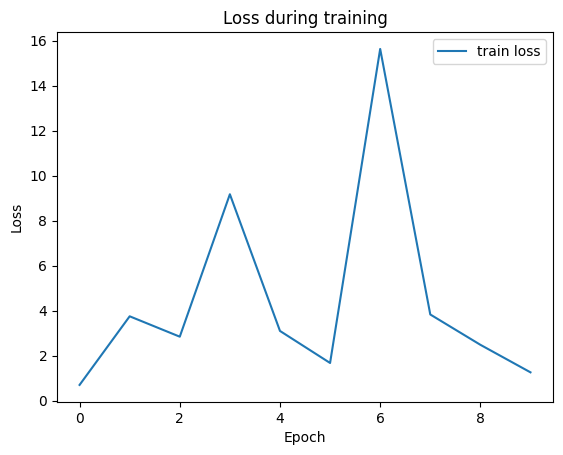

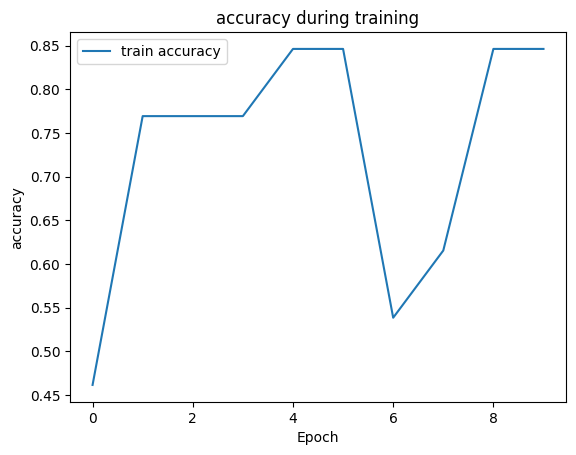

In [9]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Загрузка изображений
def load_images():
    images = []
    labels = []
    for i in range(17):
        image_filename = f'test_image_{i:02d}.jpg'
        img = cv2.imread(image_filename)
        if img is not None:
            img = cv2.resize(img, (768, 768))  # Убедимся, что все изображения имеют одинаковый размер
            images.append(img)
            # Определяем метку на основе имени файла
            if i < 10:
                labels.append(0)  # Лес
            else:
                labels.append(1)  # Пустыня
    return np.array(images), np.array(labels)

# Загрузка данных
X, y = load_images()

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Создание модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(768, 768, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history =  model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='train loss')
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.title('accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Сохранение модели
model.save('forest_desert_classifier.h5')

# Загрузка модели
model = load_model('forest_desert_classifier.h5')


Должно быть:    
0-3, 5, 7-9 лес     
4, 6, 10-16 пустыня

In [10]:

# Функция для классификации изображения
def classify_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (768, 768))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # Добавление размерности для батча

    prediction = model.predict(img)
    if prediction[0] > 0.5:
        return "Desert"
    else:
        return "Forest"

# Обработка всех тестовых изображений
for i in range(17):
    image_filename = f'test_image_{i:02d}.jpg'

    if os.path.exists(image_filename):
        result = classify_image(image_filename)
        print(f'{image_filename} is classified as: {result}')
    else:
        print(f'{image_filename} does not exist.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
test_image_00.jpg is classified as: Forest
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
test_image_01.jpg is classified as: Forest
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
test_image_02.jpg is classified as: Forest
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
test_image_03.jpg is classified as: Forest
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
test_image_04.jpg is classified as: Desert
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step
test_image_05.jpg is classified as: Forest
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
test_image_06.jpg is classified as: Desert
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
test_image_07.jpg is classified as: Forest
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
test_image_08.jpg is classified as: Forest
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
test_image_09.jpg is classified as: Forest
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
test_image_10.jpg is classified as: Desert
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
test_image_11.jpg is classified as: Desert
1/1 ━━━━━━━━━━━━